In [6]:
#| warning: false
library(dplyr)
library(data.table)
library(lubridate)
library(ggplot2)

In [3]:
data = fread("compressed_data.csv.gz") %>% 
    filter(!is.na(prcod)) %>% 
        mutate(datadate = as.Date(datadate, "%d/%m/%Y"))
head(data)



tic,datadate,conm,exchg,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey
<chr>,<date>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
PNW,2023-01-03,PINNACLE WEST CAPITAL CORP,11,4911,1442534,74.63,76.4125,73.380,76.25,1075
PNW,2023-01-04,PINNACLE WEST CAPITAL CORP,11,4911,954218,75.39,76.0950,74.630,75.10,1075
PNW,2023-01-05,PINNACLE WEST CAPITAL CORP,11,4911,994775,73.65,75.0950,73.305,74.88,1075
PNW,2023-01-06,PINNACLE WEST CAPITAL CORP,11,4911,729808,75.46,76.0200,74.480,74.49,1075
PNW,2023-01-09,PINNACLE WEST CAPITAL CORP,11,4911,656127,75.55,76.4800,75.240,75.24,1075
PNW,2023-01-10,PINNACLE WEST CAPITAL CORP,11,4911,763254,75.65,75.6950,74.880,75.31,1075


## A1 Analysis

[1] "There are 502 unique tickers."

[1] "There are 499 unique company names."

tic,mean_trading_v
<chr>,<dbl>
TSLA,115314383
NVDA,113131835
PLTR,60056251
AAPL,57736403
AMD,57143415


exchg,total_trading_v
<int>,<dbl>
11,681415756062
14,570830885382
21,385399362


conm,tickers
<chr>,<int>
ALPHABET INC,2
FOX CORP,2
NEWS CORP,2
NA,NA


tic,datadate,conm,exchg,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey,return
<chr>,<date>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
PNW,2023-01-03,PINNACLE WEST CAPITAL CORP,11,4911,1442534,74.63,76.4125,73.380,76.25,1075,NA
PNW,2023-01-04,PINNACLE WEST CAPITAL CORP,11,4911,954218,75.39,76.0950,74.630,75.10,1075,0.010183572
PNW,2023-01-05,PINNACLE WEST CAPITAL CORP,11,4911,994775,73.65,75.0950,73.305,74.88,1075,-0.023079984
PNW,2023-01-06,PINNACLE WEST CAPITAL CORP,11,4911,729808,75.46,76.0200,74.480,74.49,1075,0.024575696
PNW,2023-01-09,PINNACLE WEST CAPITAL CORP,11,4911,656127,75.55,76.4800,75.240,75.24,1075,0.001192685
PNW,2023-01-10,PINNACLE WEST CAPITAL CORP,11,4911,763254,75.65,75.6950,74.880,75.31,1075,0.001323627


tic,mean_return
<chr>,<dbl>
PLTR,0.005785119
COIN,0.005497913
GEV,0.005246567
VST,0.004044824
META,0.003367155
RCL,0.003353639


[1] "The PLTR ticker had the higest mean daily return."

[1] "The return was 0.58 %."

[1] "The PLTR company had the higest mean daily return."

[1] "The 6798 SIC industry has the most companies."

[1] "There are 28 companies in that industry."

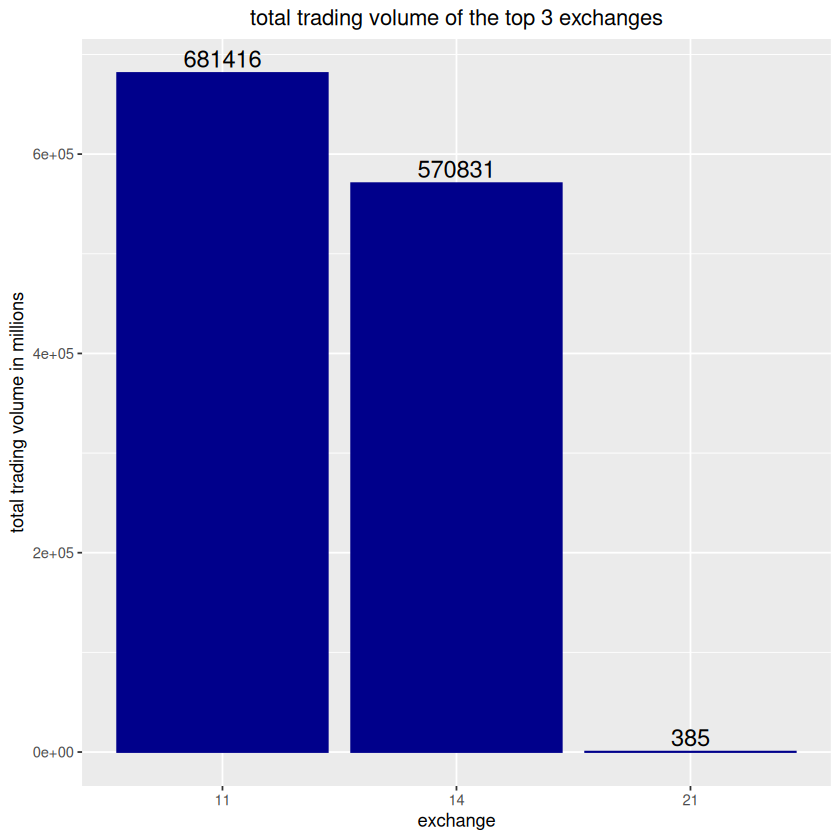

In [4]:
# 1. How many unique tickers are in your data?
unique_tic_n = length(unique(data$tic))
paste("There are", unique_tic_n, "unique tickers.")

# 2. How many unique companies are in your data?
unique_conm_n = length(unique(data$conm))
paste("There are", unique_conm_n, "unique company names.")

# 3. Display the top 5 companies by largest mean trading volume, in a table.
data_3 = data %>%
    group_by(tic) %>%
    summarise(mean_trading_v = mean(cshtrd, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(mean_trading_v))
data_3[1:5,]

# 4. Display the total trading volume of the top 3 exchanges by largest total trading volume, in a table.
data_4 = data %>%
    group_by(exchg) %>%
    summarise(total_trading_v = sum(cshtrd, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(total_trading_v))
data_4[1:3,]

# 5. Visualise the total trading volume of the top 3 exchanges by largest total trading volume, in a bar plot.
ggplot(data_4, aes(x = as.character(exchg), y = total_trading_v/1000000)) +
  geom_bar(stat = "identity", color = "darkblue", fill = "darkblue") +
  geom_text(aes(label = round(total_trading_v/1000000)),
            vjust = -0.3,              # position above the bar
            size = 5) +               # text size
  labs(title = "total trading volume of the top 3 exchanges",
  x= "exchange", y="total trading volume in millions") +
  theme(plot.title = element_text(hjust = 0.5))

# 6. How many companies have more than one ticker?
data_6 = data %>%
    group_by(conm) %>%
    summarise(tickers = n_distinct(tic)) %>%
    ungroup() %>% 
    filter(!tickers == 1)
data_6[1:4,]

# 7. Which ticker has the largest positive mean return (simple daily return)?
data = data %>% 
    group_by(tic) %>% 
    mutate(return = prccd/lag(prccd)-1) %>% 
    ungroup()
head(data)

data_7 = data %>% 
    group_by(tic) %>% 
    summarise(mean_return = mean(return, na.rm = TRUE)) %>% 
    ungroup() %>% 
        arrange(desc(mean_return))
head(data_7)

highest_mean_return = max(data_7$mean_return)

highest_mean_return_ticker = data_7$tic[
    which.max(data_7$mean_return)
]
paste("The", highest_mean_return_ticker, "ticker had the higest mean daily return.")
paste("The return was", round(highest_mean_return, 4)*100,"%.")

# 8. Which company has the largest positive mean return (simple daily return)?
paste("The", highest_mean_return_ticker, "company had the higest mean daily return.")

# 9. Which industry is represented by the most companies?
data_9 = data %>%
    group_by(sic) %>%
    summarise(no_companies = n_distinct(conm)) %>%
    ungroup() %>% 
    arrange(desc(no_companies))
most_represented_industry = data_9$sic[
    which.max(data_9$no_companies)
]
no_companies_in_most_represented_industry = max(data_9$no_companies)

paste("The", most_represented_industry, "SIC industry has the most companies.")
paste("There are", no_companies_in_most_represented_industry, "companies in that industry.")


## A2 Analysis

In [147]:
# 1. Calculate simple weekly returns for each ticker in the full dataset using the following formula
head(data)
data_weekly = data %>% 
    mutate(friday = floor_date(datadate, "week")+5) %>% 
    filter(friday == datadate) %>% 
        group_by(tic) %>%
        mutate(simple_weekly_return = prccd / lag(prccd) - 1) %>%
        select(tic, conm, friday, datadate, prccd, simple_weekly_return) %>%
        ungroup()
head(data_weekly)

# 2. Categorise your data into decile groups based on simple weekly returns, labelled 0%, 10%, 20%, ...
# Do not remove zero returns from the data
c_breaks = seq(0, 1, by = 0.1)
print(c_breaks)

c_labels <- paste0((1:(length(c_breaks) - 1)) * 10, "%")
print(c_labels)

data_weekly_deciles <- data_weekly %>% 
    mutate(
        deciles = cut(
            simple_weekly_return,
            breaks = quantile(
            simple_weekly_return,
            probs = c_breaks,
            type = 9,
            na.rm = TRUE
            ),
        labels = c_labels,
        include.lowest = TRUE
        )
    ) %>% 
  arrange(tic, datadate)
head(data_weekly_deciles)




tic,datadate,conm,exchg,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey,return
<chr>,<date>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
A,2023-01-03,AGILENT TECHNOLOGIES INC,11,3826,1414284,150.04,153.13,148.470,151.96,126554,NA
A,2023-01-04,AGILENT TECHNOLOGIES INC,11,3826,1247420,151.67,153.04,150.240,151.65,126554,0.010863770
A,2023-01-05,AGILENT TECHNOLOGIES INC,11,3826,1714635,152.11,153.07,148.770,150.00,126554,0.002901035
A,2023-01-06,AGILENT TECHNOLOGIES INC,11,3826,2444397,147.67,154.64,143.010,154.36,126554,-0.029189402
A,2023-01-09,AGILENT TECHNOLOGIES INC,11,3826,1269488,147.47,151.28,147.198,149.69,126554,-0.001354371
A,2023-01-10,AGILENT TECHNOLOGIES INC,11,3826,1565745,155.23,155.55,148.750,150.18,126554,0.052620872


tic,conm,friday,datadate,prccd,simple_weekly_return
<chr>,<chr>,<date>,<date>,<dbl>,<dbl>
A,AGILENT TECHNOLOGIES INC,2023-01-06,2023-01-06,147.67,NA
A,AGILENT TECHNOLOGIES INC,2023-01-13,2023-01-13,156.92,0.062639670
A,AGILENT TECHNOLOGIES INC,2023-01-20,2023-01-20,155.92,-0.006372674
A,AGILENT TECHNOLOGIES INC,2023-01-27,2023-01-27,155.69,-0.001475115
A,AGILENT TECHNOLOGIES INC,2023-02-03,2023-02-03,154.55,-0.007322243
A,AGILENT TECHNOLOGIES INC,2023-02-10,2023-02-10,152.55,-0.012940796


 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0
 [1] "10%"  "20%"  "30%"  "40%"  "50%"  "60%"  "70%"  "80%"  "90%"  "100%"


tic,conm,friday,datadate,prccd,simple_weekly_return,deciles
<chr>,<chr>,<date>,<date>,<dbl>,<dbl>,<fct>
A,AGILENT TECHNOLOGIES INC,2023-01-06,2023-01-06,147.67,NA,NA
A,AGILENT TECHNOLOGIES INC,2023-01-13,2023-01-13,156.92,0.062639670,100%
A,AGILENT TECHNOLOGIES INC,2023-01-20,2023-01-20,155.92,-0.006372674,40%
A,AGILENT TECHNOLOGIES INC,2023-01-27,2023-01-27,155.69,-0.001475115,50%
A,AGILENT TECHNOLOGIES INC,2023-02-03,2023-02-03,154.55,-0.007322243,40%
A,AGILENT TECHNOLOGIES INC,2023-02-10,2023-02-10,152.55,-0.012940796,40%


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `simple_weekly_return == max(simple_weekly_return, na.rm =
  TRUE)`.
ℹ In group 11: `deciles = NA`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf”


tic,conm,datadate,friday,prccd,simple_weekly_return,deciles
<chr>,<chr>,<date>,<date>,<dbl>,<dbl>,<fct>
SMCI,SUPER MICRO COMPUTER INC,2024-11-22,2024-11-22,33.15,0.784176534,100%
MSFT,MICROSOFT CORP,2023-06-16,2023-06-16,342.33,0.047553475,90%
CMI,CUMMINS INC,2023-11-17,2023-11-17,225.50,0.029586339,80%
MRNA,MODERNA INC,2024-12-27,2024-12-27,40.13,0.018786494,70%
CSCO,CISCO SYSTEMS INC,2023-08-04,2023-08-04,52.63,0.010366673,60%
GE,GE AEROSPACE,2023-10-27,2023-10-27,106.35,0.002545249,50%
CCI,CROWN CASTLE INC,2023-08-25,2023-08-25,99.70,-0.005287838,40%
GLW,CORNING INC,2023-04-14,2023-04-14,34.78,-0.014172336,30%
CSX,CSX CORP,2024-05-17,2024-05-17,33.52,-0.025014543,20%


[1] "CSCO"

tic,conm,friday,datadate,prccd,simple_weekly_return
<chr>,<chr>,<date>,<date>,<dbl>,<dbl>
CSCO,CISCO SYSTEMS INC,2023-01-13,2023-01-13,48.88,0.011589404
CSCO,CISCO SYSTEMS INC,2023-01-20,2023-01-20,46.78,-0.042962357
CSCO,CISCO SYSTEMS INC,2023-01-27,2023-01-27,48.51,0.036981616
CSCO,CISCO SYSTEMS INC,2023-02-03,2023-02-03,48.63,0.002473717
CSCO,CISCO SYSTEMS INC,2023-02-10,2023-02-10,47.26,-0.028171910
CSCO,CISCO SYSTEMS INC,2023-02-17,2023-02-17,50.77,0.074269996


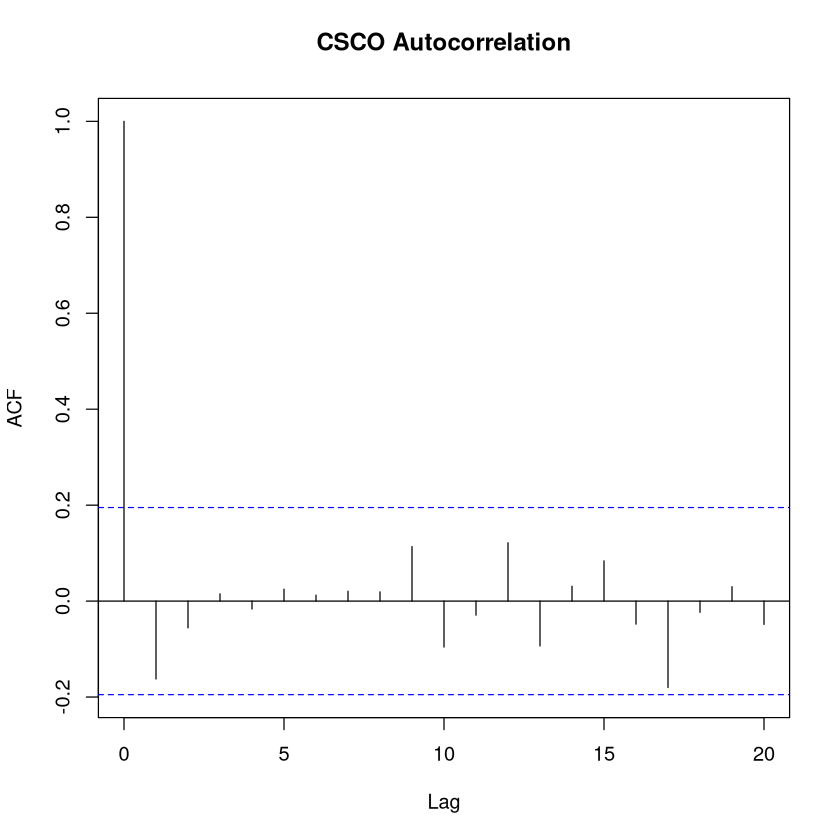

In [161]:
# 3. Display a table showing the top ticker (the ticker with the highest weekly return) in each decile group
#| warning: false
df_top_ticker = data_weekly_deciles %>% 
    group_by(deciles) %>% 
    filter(simple_weekly_return == max(simple_weekly_return, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(deciles)) %>%
        select(tic, conm, datadate, friday, prccd, simple_weekly_return, deciles)

df_top_ticker[1:11,]

# 4. Select the top ticker from the 60% decile group.
# Use this ticker for the rest of the assignment, including in Part Ill.
top_ticker_60d = as.character(df_top_ticker %>% 
    filter(deciles == "60%") %>% 
    select(tic)
    )
paste(top_ticker_60d)

# 5. Plot the autocorrelation function for this ticker's entire set of weekly returns
#| fig-cap: "Autocorrelation CSCO Returns"

# Filter for CSCO, remove NA values
csco_data = data_weekly %>% 
    filter(tic == top_ticker_60d) %>% 
        na.omit()
head(csco_data)

# Autocorrelate, add a main title
acf(csco_data$simple_weekly_return, main = "CSCO Autocorrelation")


